Alunos: Daniel de Paula, Gustavo Guerreiro e Mayara Cardoso Simões


Imports necessários pata as 3 fases

In [34]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fase 1

Coeficiente de correlação para o Grupo 1: 0.81642
Coeficiente de correlação para o Grupo 2: 0.80612
Coeficiente de correlação para o Grupo 3: 0.81652
Regressão para o Grupo 1: beta0 = 3.00009, beta1 = 0.50009
Regressão para o Grupo 2: beta0 = 3.06473, beta1 = 0.49018
Regressão para o Grupo 3: beta0 = 3.00173, beta1 = 0.49991


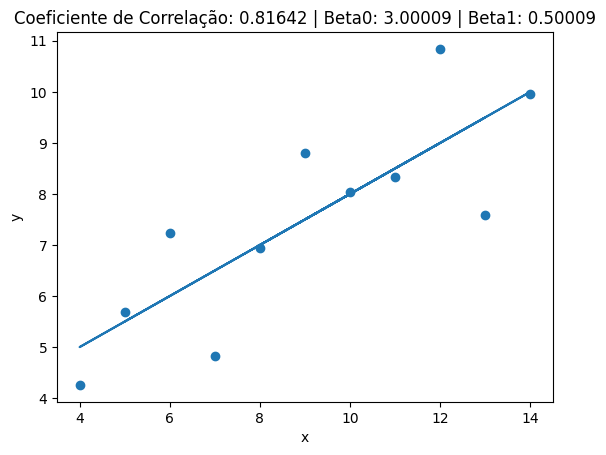

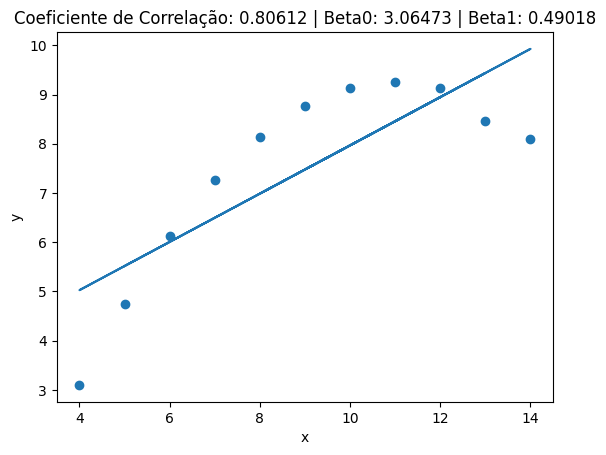

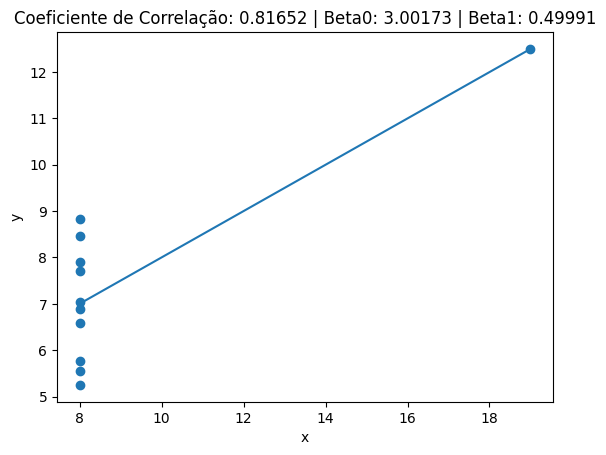

In [35]:
x1 = [10,8,13,9,11,14,6,4,12,7,5]
y1 = [8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68]


x2 = [10,8,13,9,11,14,6,4,12,7,5]
y2 = [9.14,8.14,8.47,8.77,9.26,8.10,6.13,3.10,9.13,7.26,4.74]


x3 = [8,8,8,8,8,8,8,8,8,8,19]
y3 = [6.58,5.76,7.71,8.84,8.47,7.04,5.25,5.56,7.91,6.89,12.50]

"""
1) Implemente duas funções chamadas correlacao e regressao. Cada uma deve ter dois vetores Nx1 como entrada,
 onde N é a dimensão do vetor (no caso de x N=11). A primeira função deve calcular o coeficiente de correlação
  r, e a segunda função deve calcular a regressão, isto é, β0 e β1.
"""
def correlacao(x, y):
  n = len(x)
  media_x = sum(x) / n
  media_y = sum(y) / n

  produto = [(x[i] - media_x) * (y[i] - media_y) for i in range(n)]
  soma_produto = sum(produto)

  soma_quadrados_x = sum([(xi - media_x)**2 for xi in x])
  soma_quadrados_y = sum([(yi - media_y)**2 for yi in y])

  r = soma_produto / math.sqrt(soma_quadrados_x * soma_quadrados_y)
  return r

def regressao(x, y):
    n = len(x)
    media_x = sum(x) / n
    media_y = sum(y) / n

    numerador = sum((xi - media_x) * (yi - media_y) for xi, yi in zip(x, y))
    denominador = sum((xi - media_x) ** 2 for xi in x)

    beta1 = numerador / denominador

    beta0 = media_y - beta1 * media_x

    return beta0, beta1

"""
2)      Faça um script no Python chamado demo onde para cada dataset, faça os seguintes comandos:

Faça um Gráfico de Dispersão (veja função scatter).
Calcule o coeficiente de correlação.
Trace a linha da regressão no Gráfico de Dispersão (veja a função plot)
Mostre os coeficientes de correlação e regressão no Gráfico de Dispersão (utilize a função title)
"""

def gerar_grafico_dispersao(x, y):
    plt.scatter(x, y)
    plt.xlabel('x')
    plt.ylabel('y')

def y_de_chapeu(x, beta0, beta1):
    return [beta0 + (beta1 * x_atual) for x_atual in x]

def gerar_linha_regressao(x, beta0, beta1):
    plt.plot(x, y_de_chapeu(x, beta0, beta1))

def main():
  r1 = correlacao(x1, y1)
  r2 = correlacao(x2, y2)
  r3 = correlacao(x3, y3)

  print(f"Coeficiente de correlação para o Grupo 1: {r1:.5f}")
  print(f"Coeficiente de correlação para o Grupo 2: {r2:.5f}")
  print(f"Coeficiente de correlação para o Grupo 3: {r3:.5f}")

  beta0_1, beta1_1 = regressao(x1, y1)
  beta0_2, beta1_2 = regressao(x2, y2)
  beta0_3, beta1_3 = regressao(x3, y3)

  print(f"Regressão para o Grupo 1: beta0 = {beta0_1:.5f}, beta1 = {beta1_1:.5f}")
  print(f"Regressão para o Grupo 2: beta0 = {beta0_2:.5f}, beta1 = {beta1_2:.5f}")
  print(f"Regressão para o Grupo 3: beta0 = {beta0_3:.5f}, beta1 = {beta1_3:.5f}")

  gerar_grafico_dispersao(x1, y1)
  gerar_linha_regressao(x1, beta0_1, beta1_1)
  plt.title(f'Coeficiente de Correlação: {r1:.5f} | Beta0: {beta0_1:.5f} | Beta1: {beta1_1:.5f}')
  plt.show()

  gerar_grafico_dispersao(x2, y2)
  gerar_linha_regressao(x2, beta0_2, beta1_2)
  plt.title(f'Coeficiente de Correlação: {r2:.5f} | Beta0: {beta0_2:.5f} | Beta1: {beta1_2:.5f}')
  plt.show()

  gerar_grafico_dispersao(x3, y3)
  gerar_linha_regressao(x3, beta0_3, beta1_3)
  plt.title(f'Coeficiente de Correlação: {r3:.5f} | Beta0: {beta0_3:.5f} | Beta1: {beta1_3:.5f}')
  plt.show()

if __name__ == "__main__":
    main()


3) Qual dos datasets não é apropriado para regressão linear?
A segunda, pois formam um trajeto curvilinear então uma solução linear não se encaixa no tipo de problema, sendo muito simples. Enquanto a terceira possui dados ruins, então nenhum tipo de análise seria eficiente.

# FASE 2: Análise de Regressão Linear Múltipla

a) Faça o download dos dados do arquivo data.mat ou data.csv. A primeira coluna é o tamanho da casa, a segunda coluna é o número de quartos, e a terceira coluna é o preço da casa.

In [36]:
data = pd.read_csv("content/data.csv", header=None)

print(data)

       0  1         2
0   2104  3  399900.0
1   1600  3  329900.0
2   2400  3  369000.0
3   1416  2  232000.0
4   3000  4  539900.0
5   1985  4  299900.0
6   1534  3  314900.0
7   1427  3  199000.0
8   1380  3  212000.0
9   1494  3  242500.0
10  1940  4  240000.0
11  2000  3  347000.0
12  1890  3  330000.0
13  4478  5  699900.0
14  1268  3  259900.0
15  2300  4  449900.0
16  1320  2  299900.0
17  1236  3  199900.0
18  2609  4  500000.0
19  3031  4  599000.0
20  1767  3  252900.0
21  1888  2  255000.0
22  1604  3  242900.0
23  1962  4  259900.0
24  3890  3  573900.0
25  1100  3  249900.0
26  1458  3  464500.0
27  2526  3  469000.0
28  2200  3  475000.0
29  2637  3  299900.0
30  1839  2  349900.0
31  1000  1  169900.0
32  2040  4  314900.0
33  3137  3  579900.0
34  1811  4  285900.0
35  1437  3  249900.0
36  1239  3  229900.0
37  2132  4  345000.0
38  4215  4  549000.0
39  2162  4  287000.0
40  1664  2  368500.0
41  2238  3  329900.0
42  2567  4  314000.0
43  1200  3  299000.0
44   852  

b) Utilize o comando python .describe() para fazer uma primeira análise estatística da sua base de dados. Qual a média de preço das casas? Quanto custa a menor casa? Quantos quartos tem a casa mais cara?

In [37]:
print(data.describe())

print(f"Média de preço das casas: {data[2].mean():.2f}")

idx_menor_casa = data[0].idxmin()
preco_menor_casa = data.loc[idx_menor_casa, 2]
print(f'Preço da menor casa: {preco_menor_casa:.2f}')

idx_mais_cara = data[2].idxmax()
quartos_mais_cara = data.loc[idx_mais_cara, 1]
print(f'Número de quartos da casa mais cara: {int(quartos_mais_cara)}')

                 0          1              2
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.765957
std     794.702354   0.760982  125039.911223
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000
Média de preço das casas: 340412.77
Preço da menor casa: 179900.00
Número de quartos da casa mais cara: 5


c) Gere uma matriz X para as variáveis independentes (que são o tamanho da casa e o número de quartos) e o vetor y da variável dependente (que é o preço).

In [38]:
data.insert(0, '1', [1 for _ in range(47)])
ys = data[2]
xs = data.drop(2, axis=1)
print(f'Matriz X\n{xs}')
print('===============')
print(f'Vetor Y\n{ys}')

Matriz X
    1     0  1
0   1  2104  3
1   1  1600  3
2   1  2400  3
3   1  1416  2
4   1  3000  4
5   1  1985  4
6   1  1534  3
7   1  1427  3
8   1  1380  3
9   1  1494  3
10  1  1940  4
11  1  2000  3
12  1  1890  3
13  1  4478  5
14  1  1268  3
15  1  2300  4
16  1  1320  2
17  1  1236  3
18  1  2609  4
19  1  3031  4
20  1  1767  3
21  1  1888  2
22  1  1604  3
23  1  1962  4
24  1  3890  3
25  1  1100  3
26  1  1458  3
27  1  2526  3
28  1  2200  3
29  1  2637  3
30  1  1839  2
31  1  1000  1
32  1  2040  4
33  1  3137  3
34  1  1811  4
35  1  1437  3
36  1  1239  3
37  1  2132  4
38  1  4215  4
39  1  2162  4
40  1  1664  2
41  1  2238  3
42  1  2567  4
43  1  1200  3
44  1   852  2
45  1  1852  4
46  1  1203  3
Vetor Y
0     399900.0
1     329900.0
2     369000.0
3     232000.0
4     539900.0
5     299900.0
6     314900.0
7     199000.0
8     212000.0
9     242500.0
10    240000.0
11    347000.0
12    330000.0
13    699900.0
14    259900.0
15    449900.0
16    299900.0
17    19

d) Verifique a correlação e a regressão para Tamanho da casa e Preço, e, Número de quartos e Preço e apresente os valores no gráfico de dispersão.

Correlação entre Tamanho da Casa e Preço: 0.8549876164803004
Correlação entre Número de Quartos e Preço: 0.4422615668462496
Regressão entre Tamanho da Casa e Preço: (71270.56635433709, 134.5253039534005)
Regressão entre Número de Quartos e Preço: (110034.26517571887, 72669.7284345048)


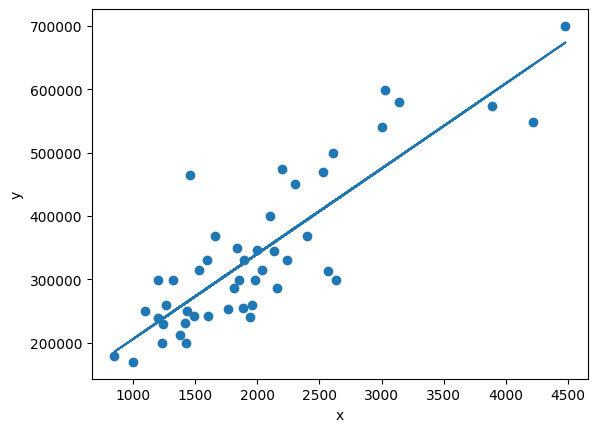

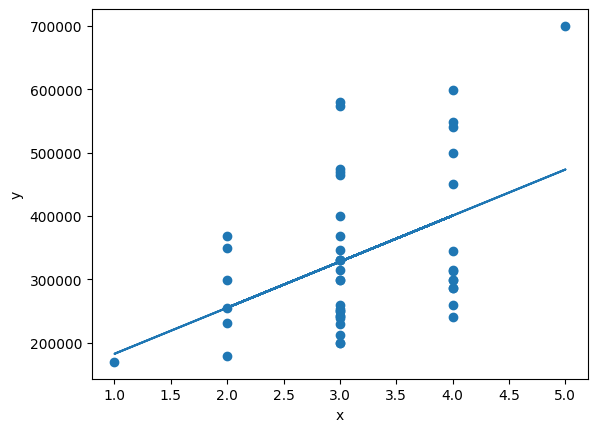

In [39]:
xs.rename(columns={0: 'tamanho', 1: 'quartos'}, inplace=True)

correlacao_tamanho_preco = correlacao(xs['tamanho'], ys)
correlacao_quartos_preco = correlacao(xs['quartos'], ys)

print('Correlação entre Tamanho da Casa e Preço:', correlacao_tamanho_preco)
print('Correlação entre Número de Quartos e Preço:', correlacao_quartos_preco)

regressao_tamanho_preco = regressao(xs['tamanho'], ys)
regressao_quartos_preco = regressao(xs['quartos'], ys)

print('Regressão entre Tamanho da Casa e Preço:', regressao_tamanho_preco)
print('Regressão entre Número de Quartos e Preço:', regressao_quartos_preco)

gerar_grafico_dispersao(xs['tamanho'], ys)
gerar_linha_regressao(xs['tamanho'], regressao_tamanho_preco[0], regressao_tamanho_preco[1])
plt.show()

gerar_grafico_dispersao(xs['quartos'], ys)
gerar_linha_regressao(xs['quartos'], regressao_quartos_preco[0], regressao_quartos_preco[1])
plt.show()

e) Calcule a Regressão Múltipla. Faça o gráfico de dispersão em 3D com o tamanho da casa, número de quartos, e o preço da casa. Neste caso iremos trabalhar com o espaço 3D (verifique como usar Axes3D).

In [40]:
xs_transposta = xs.transpose()

betas = np.linalg.inv(xs_transposta @ xs) @ (xs_transposta @ ys)

ys_de_chapeu = xs@betas

fig = go.Figure(
    data=[go.Scatter3d(x=xs['tamanho'], y=xs['quartos'], z=ys, mode='markers')]
)
fig.update_layout(title='Disperção 3D'),
fig.show()


f) Trace a linha da regressão no Gráfico de Dispersão. Você pode girar este gráfico para visualizar melhor os dados.

g)       Mostre na figura os coeficientes de correlação entre Tamanho da casa e Preço e Número de quartos e Preço.

In [41]:
b0, b1, b2 = np.ravel(betas)

x_surf, y_surf = np.meshgrid(
    np.linspace(xs['tamanho'].min(), xs['tamanho'].max(), 40),
    np.linspace(xs['quartos'].min(),  xs['quartos'].max(), 40)
)

z_surf = b0 + b1 * x_surf + b2 * y_surf

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=xs['tamanho'],
    y=xs['quartos'],
    z=ys,
    mode='markers',
    marker=dict(size=5, color='red'),
    name="Dados reais"
))

fig.add_trace(go.Surface(
    x=x_surf, y=y_surf, z=z_surf,
    colorscale="Blues", opacity=0.5,
    name="Plano de Regressão"
))

fig.update_layout(
    scene=dict(
        xaxis_title="Tamanho",
        yaxis_title="Quartos",
        zaxis_title="Preço"
    ),
    title=f"correlacao_tamanho_preco {correlacao_tamanho_preco} \n "
          f"correlacao_quartos_preco {correlacao_quartos_preco}"
)

fig.show()

h) Calcule o preço de uma casa que tem tamanho de 1650 e 3 quartos. O resultado deve ser igual a 293081. Aumente e diminua a quantidade de número de quartos. O que acontece? Por qual motivo?

In [42]:
print(b0 + b1 * 1650 + b2 * 3)

print(b0 + b1 * 1650 + b2 * 8)

print(b0 + b1 * 1650 + b2 * 1)

293081.56687350175
249391.98977256677
310557.3977138757


Se a quantidade de quartos cresce o preço diminui, se diminui, o preço aumenta. Isso ocorre devido ao beta 2 ser negativo, por causa de sua baixa correlação com os preços como se observa nos dados de treinamento. Além disso, passando para a vida real, como a área da casa não aumenta, então sobra menos espaço para os outros cômodos, podendo desvalorizar o imóvel por ser menos confortável.

i) Compare seus resultados com a função de regressão linear múltipla do python. Para isso você irá precisar das bibliotecas numpy e scikit-learn.

In [43]:
modelo = LinearRegression()
modelo.fit(xs, ys)

novo_X = pd.DataFrame([[1, 1650, 3]], columns=['1', 'tamanho', 'quartos'])
y_pred = modelo.predict(novo_X)
print(y_pred)

novo_X = pd.DataFrame([[1, 1650, 8]], columns=['1', 'tamanho', 'quartos'])
y_pred = modelo.predict(novo_X)

print(y_pred)

novo_X = pd.DataFrame([[1, 1650, 1]], columns=['1', 'tamanho', 'quartos'])
y_pred = modelo.predict(novo_X)
print(y_pred)


[293081.5668735]
[249391.98977257]
[310557.39771388]


# Fase 3: Regressão Polinomial - Overfitting

Nesta fase iremos considerar a Regressão Polinomial com uma variável x.  A Regressão Polinomial encaixa uma relação não linear entre o valor de x e o valor correspondente de y. Neste caso a fórmula geral da Regressão Polinomial é:

$y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + … + \beta_NX^N$




Desta vez, para calcular o valor de 𝛽 use a função polyfit. Você deverá verificar o que acontece quando vamos aumentamos o grau de um polinômio, ou seja, quando consideramos N = 1, 2, 3 ...

a) Baixe o arquivo data_preg.mat ou data_preg.csv. A primeira coluna representa os valores de x e a segunda coluna representa os valores de y.

In [44]:
data = pd.read_csv("content/data_preg.csv", header=None)

b) Faça o Gráfico de dispersão dos dados.

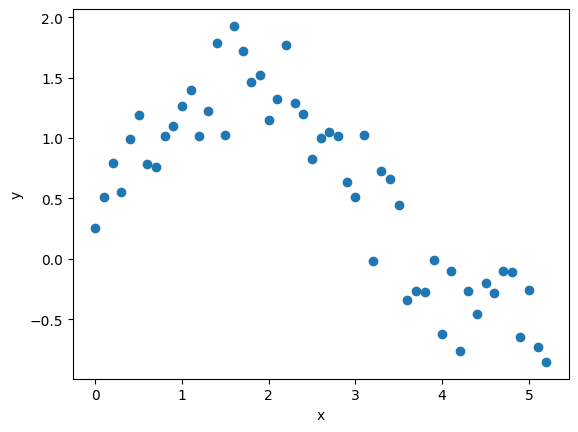

In [45]:
x = data[0]
y = data[1]
gerar_grafico_dispersao(x, y)

c) Use a função polyfit para gerar a linha de regressão para N = 1 e trace-o no gráfico de dispersão na cor vermelha (plot (x, y, 'r')). (Observe que nesta função a numeração coeficiente é invertida! $β_0=β_N$ , $β_1=β_{N−1}$, $β_2=β_{N−2}$ , ... $β_N=β_0$).

d) Trace a linha de regressão para N = 2 no gráfico na cor verde. Para isso, você deverá calcular esta função $y = 𝛽_0 + 𝛽_1X + 𝛽_2X^2 + 𝛽_3X^3 + …+ 𝛽_NX^N$, isto é, não pode usar a função pronta do python.

EQM grau 1: 0.26593426369244383
EQM grau 2: 0.13852649027579422
EQM grau 3: 0.07869725256060663
EQM grau 8: 0.058709346973583904


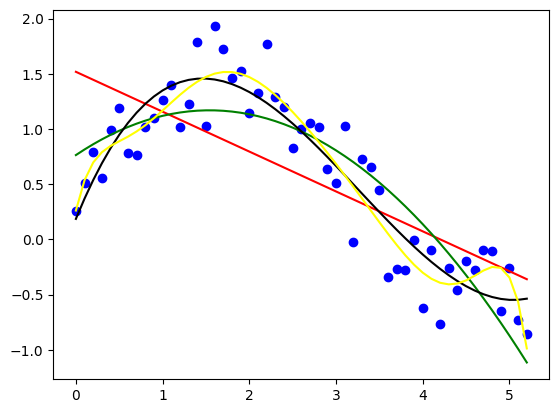

In [46]:
def ajustar_polinomio(x, y, grau):
    coeficientes = np.polyfit(x, y, grau)[::-1]
    return coeficientes

def prever(x, coeficientes):
    return [sum(coeficientes[j] * (xi ** j) for j in range(len(coeficientes))) for xi in x]

def calcular_eqm(y_real, y_previsto):
    return sum((y_previsto[i] - y_real[i])**2 for i in range(len(y_real))) / len(y_real)

plt.scatter(x, y, color='blue')


def plotar_regressoes(x_treino, y_treino, x_teste, y_teste):
    menor = float("inf")
    melhor = None
    for grau, cor in [(1, 'red'), (2, 'green'), (3, 'black'), (8, 'yellow')]:
        coef = ajustar_polinomio(x_treino, y_treino, grau)
        y_prev_treino = prever(x_treino, coef)
        y_prev_teste = prever(x_teste, coef)

        plt.plot(x_treino, y_prev_treino, color=cor)
        eqm = calcular_eqm(y_teste, y_prev_teste)
        print(f"EQM grau {grau}:", eqm)
        diferenca = abs(eqm)
        if diferenca < menor:
            menor = diferenca
            melhor = grau
    return melhor


plotar_regressoes(x, y, x, y)

plt.show()


h) Para evitar o overfitting, divida os dados aleatoriamente em Dados de Treinamento e Dados de Teste. Use 10% dos dados como conjunto de teste, e o resto como de treinamento.

In [47]:
qtd_elementos = int(0.10 * len(data))
indices_teste = np.random.choice(range(len(data)), size=qtd_elementos, replace=False)

x_teste = [x[i] for i in indices_teste]
y_teste = [y[i] for i in indices_teste]

x_treino = [x[i] for i in range(len(x)) if i not in indices_teste]
y_treino = [y[i] for i in range(len(y)) if i not in indices_teste]

i) Repita os passos de c - f, mas agora use apenas os dados de treinamento para ajustar a linha de regressão.

j) Repita o passo g, mas agora utilize somente os dados de Teste para calcular o erro.

EQM grau 1: 0.14912770681488335
EQM grau 2: 0.18268066837414546
EQM grau 3: 0.13795502412624316
EQM grau 8: 0.21575399836175208


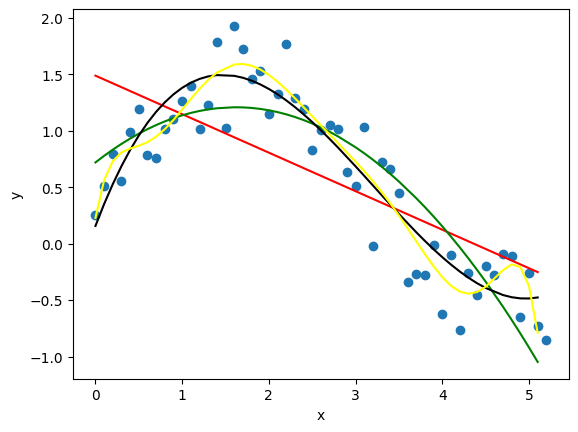

In [48]:
gerar_grafico_dispersao(x, y)
melhor_eqm = plotar_regressoes(x_treino, y_treino, x_teste, y_teste)

k) Veja o que calcula o Coeficiente de Determinação ou R quadrado. Calcule o R2 para os dados de treino e teste (veja a função r2_score da biblioteca sklearn.metrics). O que se pode concluir com os resultados?

In [49]:
def aplicar_r2(x_treinamento, y_treinamento, x_testando, y_testando, grau):
    coeficientes = ajustar_polinomio(x_treinamento, y_treinamento, grau)
    y_previsto = prever(x_testando, coeficientes)
    return r2_score(y_testando, y_previsto)

menor = float("inf")
melhor_r2 = None
for i in [1,2,3,8]:
    num = aplicar_r2(x_treino, y_treino, x_teste, y_teste, i)
    print(f"{i} (teste): {num}")
    print(f"{i} (treino): {aplicar_r2(x_treino, y_treino, x_treino, y_treino, i)}")
    diferenca = ((1-num)**2)**(1/2)
    if diferenca < menor:
        menor = diferenca
        melhor_r2 = i

1 (teste): 0.6858371193983683
1 (treino): 0.4892431462488507
2 (teste): 0.6151520986110603
2 (treino): 0.7527693261885928
3 (teste): 0.7093742759233346
3 (treino): 0.8655055138460047
8 (teste): 0.5454775033134023
8 (treino): 0.9026530269688054


Concluímos que o $R^2$ chega ao mesmo resultado que o $EQM$ de qual grau é o melhor.

l) Visto o cálculo do erro e do coeficiente de determinação, qual o modelo mais preciso neste caso? Explique sua resposta.

In [50]:
print(f"O melhor modelo é o de grau {melhor_r2} (segundo o R2).")
print(f"O melhor modelo é o de grau {melhor_eqm} (segundo o EQM).")

O melhor modelo é o de grau 3 (segundo o R2).
O melhor modelo é o de grau 3 (segundo o EQM).


Como é possível que haja diferença entre $R^2$ e o $EQM$, cabe a análise da melhor métrica para se escolher o grau do modelo escolhido, neste caso para fins de exemplificaçao será escolhido o grau adquirido através da métrica de $EQM$. Neste caso:

In [51]:
print(melhor_eqm)

3
